## Requirement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import cv2
import urllib
from IPython.display import Image

from tqdm.notebook import tqdm_notebook

---

## Simple EDA

In [2]:
raw_df = pd.read_csv('./data/raw_data.csv')
raw_df.head()

,id,name,brand_id,brand_name,parent_category_id,parent_category_name,category_id,category_id.1,price,image_url
0,2926,사슴 배냇저고리 세트_Cotton,5,호호당,2.0,의류,25.0,신생아의류,42000,https://hohodangstore.co.kr/web/product/medium...
1,2929,아이 백일 선물 세트,5,호호당,1.0,용품,27.0,기타용품,92000,https://hohodangstore.co.kr/web/product/medium...
2,2930,[카드] 연하장 : New year 2021,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...
3,2931,[카드] 일상 : Thanks and love,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...
4,2932,금줄,5,호호당,1.0,용품,27.0,기타용품,35000,https://hohodangstore.co.kr/web/product/medium...


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405150 entries, 0 to 405149
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    405150 non-null  int64  
 1   name                  404903 non-null  object 
 2   brand_id              405150 non-null  int64  
 3   brand_name            405150 non-null  object 
 4   parent_category_id    390674 non-null  float64
 5   parent_category_name  390674 non-null  object 
 6   category_id           390674 non-null  float64
 7   category_id.1         390674 non-null  object 
 8   price                 405150 non-null  int64  
 9   image_url             405150 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 30.9+ MB


In [4]:
raw_df['parent_category_id'].unique()

array([ 2.,  1.,  3., nan])

In [5]:
print(len(raw_df[raw_df['parent_category_id'] == 1]['category_id'].unique())) # 용품
print(len(raw_df[raw_df['parent_category_id'] == 2]['category_id'].unique())) # 의류
print(len(raw_df[raw_df['parent_category_id'] == 3]['category_id'].unique())) # 잡화

13
13
10


In [6]:
raw_df['temp'] = 1
raw_df.head()

,id,name,brand_id,brand_name,parent_category_id,parent_category_name,category_id,category_id.1,price,image_url,temp
0,2926,사슴 배냇저고리 세트_Cotton,5,호호당,2.0,의류,25.0,신생아의류,42000,https://hohodangstore.co.kr/web/product/medium...,1
1,2929,아이 백일 선물 세트,5,호호당,1.0,용품,27.0,기타용품,92000,https://hohodangstore.co.kr/web/product/medium...,1
2,2930,[카드] 연하장 : New year 2021,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...,1
3,2931,[카드] 일상 : Thanks and love,5,호호당,1.0,용품,27.0,기타용품,2500,https://hohodangstore.co.kr/web/product/medium...,1
4,2932,금줄,5,호호당,1.0,용품,27.0,기타용품,35000,https://hohodangstore.co.kr/web/product/medium...,1


In [7]:
category_info = raw_df.pivot_table(index=['parent_category_id', 'category_id'], values='temp', aggfunc=np.sum)

<AxesSubplot:xlabel='parent_category_id,category_id'>

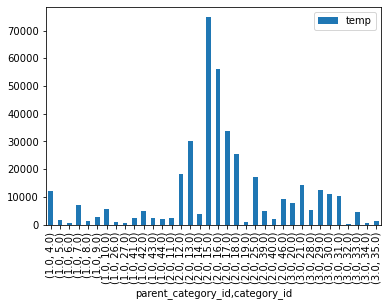

In [8]:
category_info.plot(kind='bar')

- parent category id: 1 = 용품, 2 = 의류, 3 = 잡화
- 확실히 의류 데이터 수가 다른 부모 카테고리에 비해 압도적으로 많음.
- 의류 데이터는 하위 13개의 자식 카테고리를 갖고 있음.

In [9]:
category_info

temp
parent_category_id category_id       
1.0                4.0          12211
                   5.0           1725
                   6.0            713
                   7.0           6922
                   8.0           1313
                   9.0           2609
                   10.0          5449
                   26.0           918
                   27.0           684
                   41.0          2346
                   42.0          4826
                   43.0          2257
                   44.0          2017
2.0                11.0          2314
                   12.0         18194
                   13.0         30204
                   14.0          3963
                   15.0         74737
                   16.0         56107
                   17.0         33899
                   18.0         25572
                   19.0           822
                   25.0         17075
                   39.0          5059
                   40.0          2017
                   46.0          9180
3.0                20.0          7593
                   21.0         14354
                   28.0          5253
                   29.0         12322
                   30.0         11055
                   31.0         10370
                   32.0           347
                   33.0          4463
                   34.0           631
                   35.0          1153

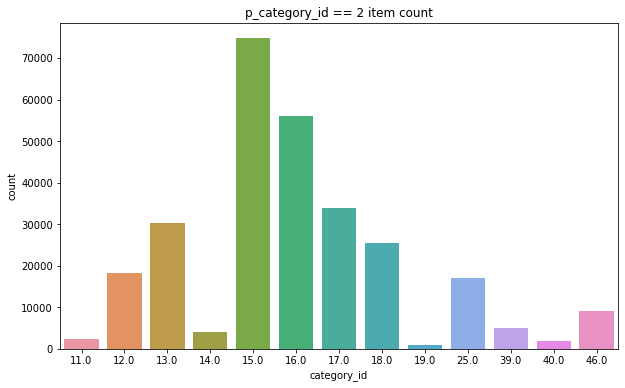

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_df[raw_df['parent_category_id'] == 2], x='category_id')
plt.title('p_category_id == 2 item count')
plt.show()

In [11]:
temp = category_info.reset_index()
temp.head()

,parent_category_id,category_id,temp
0,1.0,4.0,12211
1,1.0,5.0,1725
2,1.0,6.0,713
3,1.0,7.0,6922
4,1.0,8.0,1313


In [12]:
np.mean(temp[temp['parent_category_id'] == 2]['temp'])

21472.53846153846

<AxesSubplot:xlabel='temp'>

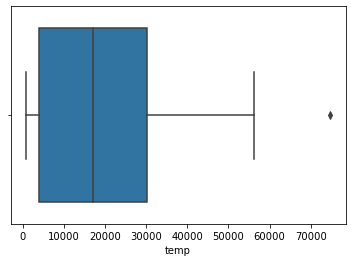

In [13]:
sns.boxplot(data = temp[temp['parent_category_id'] == 2], x = 'temp')

In [14]:
fig = px.box(temp[temp['parent_category_id'] == 2]['temp'])
fig.show()

- iqr 사분위수 1지점 값: 3550개로 세팅.
- category_id 15 16 17 18번 같은 경우는 데이터 건수가 많지만 일단 적은쪽에 맞춰 테스트 진행.
- 의류 데이터 별로 max 3550개로 맞춰서 자르기

- 일단 테스트로 가장 데이터가 많은 parent_category_id = 2, category_id = 15 로 특징 추출 테스트 진행

In [15]:
print(raw_df[raw_df['parent_category_id'] == 2]['parent_category_name'][0])
print(raw_df[raw_df['category_id'] == 15]['category_id.1'].unique()[0])

의류
상의


---

## opencv로 imageurl로부터 image 읽기

In [16]:
raw_df['image_url'][0]

'https://hohodangstore.co.kr/web/product/medium/20200422/3e7803ae7120a444ea3a0b014f973d4f.png'

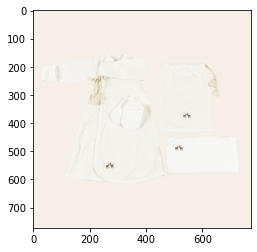

In [17]:
url = raw_df['image_url'][0]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


In [18]:
img.shape

(772, 772, 3)

- 정방형의 경우 -> 바로 resizing

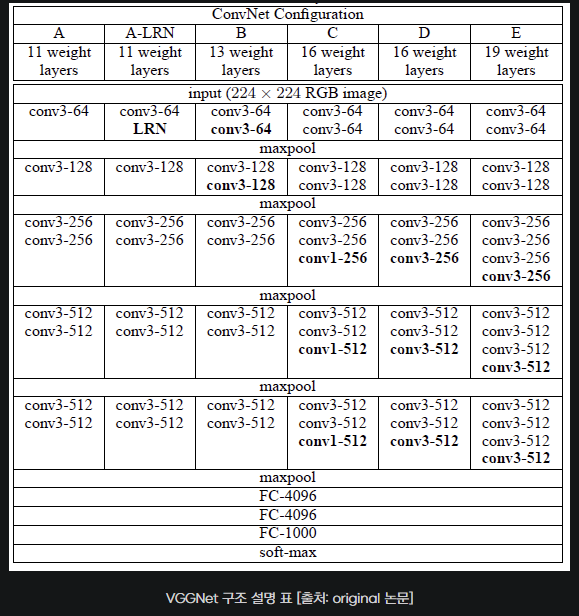

In [19]:
Image("./data/explain1.PNG")

- 위 표에서 D구조가 VGG16 input size 224 x 224 이므로 해당 픽셀에 맞게 resizing

dst shape: (224, 224, 3)


(-0.5, 223.5, 223.5, -0.5)

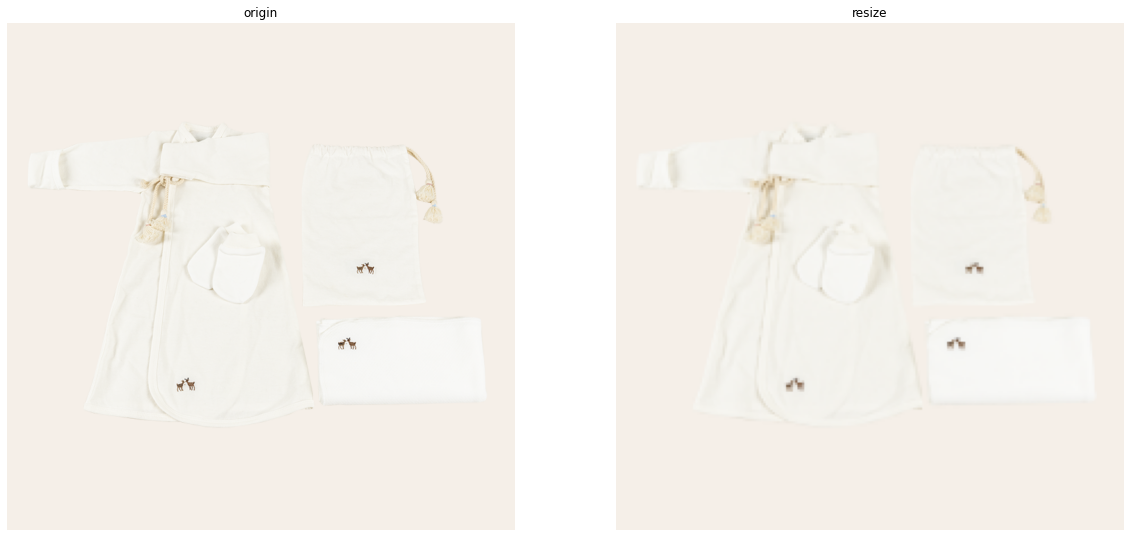

In [20]:
# 이미지 픽셀을 축소하는 것이므로 영역 보간법 사용.

dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
print(f'dst shape: {dst.shape}')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('origin')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('resize')
plt.axis('off')

- 픽셀을 줄였을시 한복에 보이는 상세한 자수 모양은 좀 깨지는것 처럼 보인다.

In [21]:
long = []
wide = []
square = []

for i, row in tqdm_notebook(raw_df[:1000].iterrows()):
    try:
        url = row['image_url']
        req = urllib.request.urlopen(url)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        height = img.shape[0]
        width = img.shape[1]

        if width > height:
            wide.append(url)
        elif width < height:
            long.append(url)
        else:
            square.append(url)
    except:
        continue

print(len(long), len(wide), len(square))

0it [00:00, ?it/s]

391 544 34


In [22]:
long

['https://littletini.co.kr/web/product/medium/202108/35ee1800414a10d13b5e2cd663153c86.jpg',
 'https://littletini.co.kr/web/product/medium/20191223/4c2b7cb4e3ddecbcb1a9bdb3723dacde.jpg',
 'https://littletini.co.kr/web/product/medium/20191220/7de59a2915ca54a5303af219dfffa4c5.jpg',
 'https://littletini.co.kr/web/product/medium/20191220/e1d3d30f2cc74ccebfedf36b9fd5d554.jpg',
 'https://littletini.co.kr/web/product/medium/20191223/b65fd21e797a5e6441a094b47097db28.jpg',
 'https://littletini.co.kr/web/product/medium/20191223/e54147237079df4dce28461319cc66ff.jpg',
 'https://littletini.co.kr/web/product/medium/20191220/83ed6c9135a7ab42467a5add3ad8e5ca.jpg',
 'https://littletini.co.kr/web/product/medium/20191219/1712b5421056730e9a1604e46ddd0aa9.jpg',
 'https://littletini.co.kr/web/product/medium/20191219/0f96cbeffe00b31de8535ad8ebc21a42.jpg',
 'https://littletini.co.kr/web/product/medium/20191219/72bb2ffafce292e6e107cdf50703dc9d.jpg',
 'https://littletini.co.kr/web/product/medium/20191219/ebe973b

In [23]:
def compare_image(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('origin')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title('resize')
    plt.axis('off')

In [24]:
# 참고 - https://github.com/jinokiim/jinokiim.github.io/blob/46d9af6854bd71740991e5efb3fdcb005b6de1c1/post_opencv/_posts/2021-09-28-opencv_ch5_1.md

def compare_image_test1(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 0.32배 축소 변환행렬
    m_small = np.float32([[0.32, 0, 33], [0, 0.32, 0]])

    dst = cv2.warpAffine(img, m_small, (224, 224), None, cv2.INTER_AREA)
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('origin')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title('resize')
    plt.axis('off')

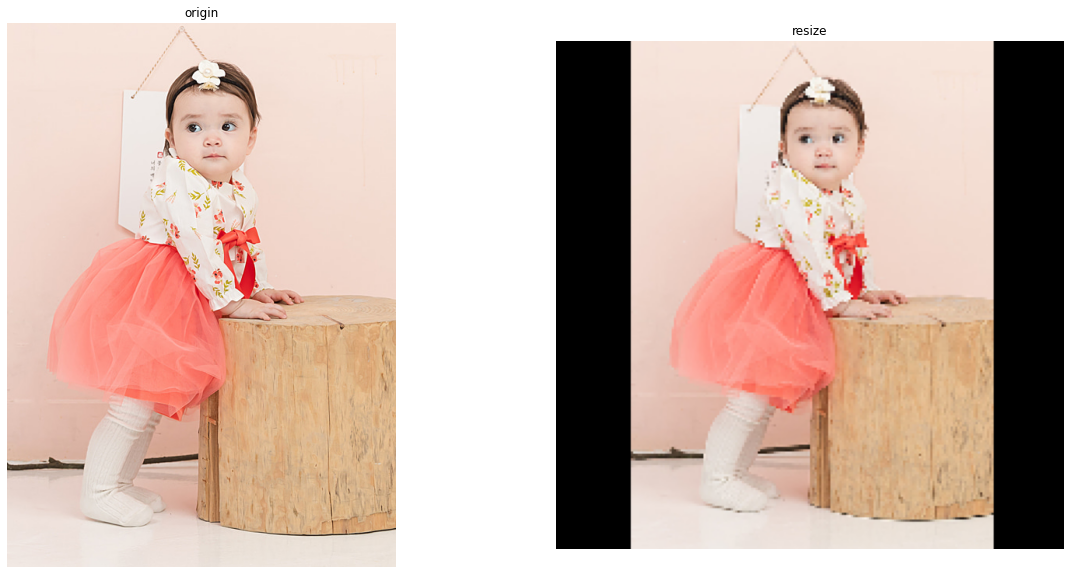

In [25]:
compare_image_test1(long[17])

In [26]:
def compare_image_test2(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    m_small = np.float32([[0.32, 0, 33], [0, 0.32, 0]])
    back_color = tuple([int(x) for x in img[1,1]])

    dst = cv2.warpAffine(img, m_small, (224, 224), None, cv2.INTER_AREA, borderValue=back_color)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('origin')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title('resize')
    plt.axis('off')

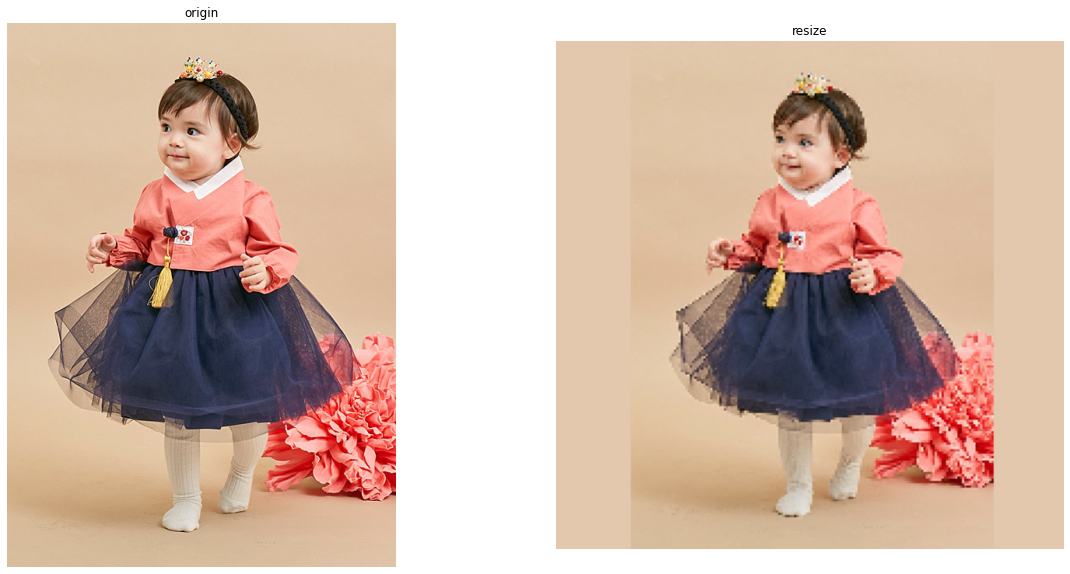

In [27]:
compare_image_test2(long[15])

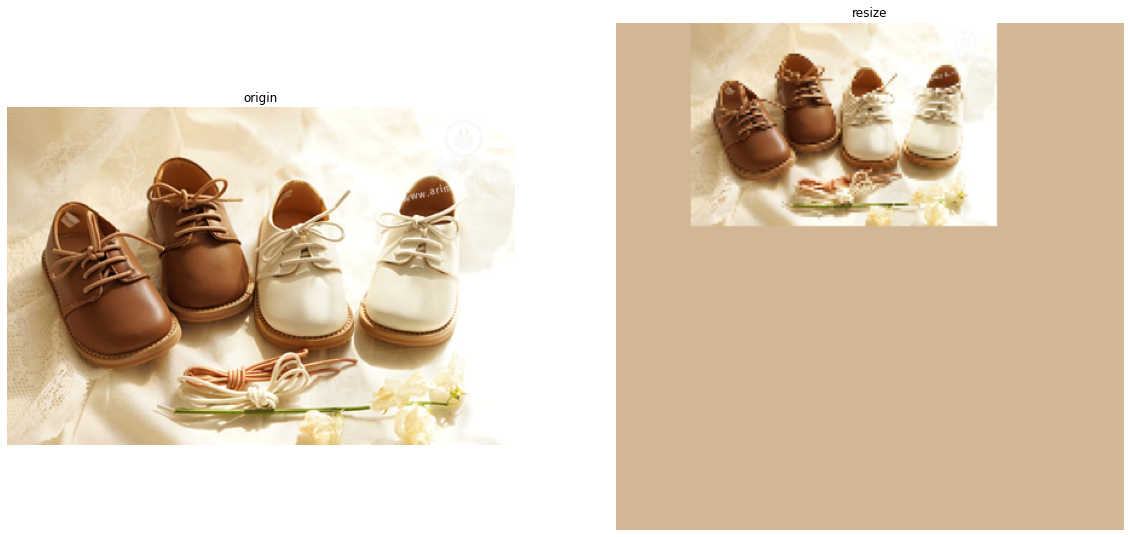

In [28]:
compare_image_test2(wide[0])

In [103]:
def compare_image_test3(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    back_color = tuple([int(x) for x in img[1,1]])
    h, w = img.shape[:2]
    diff = abs(h - w) // 2

    if h > w:
        h_cut = np.float32([[224/ h, 0, diff*224/h], [0, 224/h, 0]])
        dst = cv2.warpAffine(img, h_cut, (224, 224), None, cv2.INTER_AREA, borderValue=back_color)
    else:
        w_cut = np.float32([[224/w, 0, 0], [0, 224/w, diff*225/w]])
        dst = cv2.warpAffine(img, w_cut, (224,224), None, cv2.INTER_AREA, borderValue=back_color)
    # diff = abs(img.shape[0] - img.shape[1])
    # if img.shape[0] > img.shape[1]:
    #     dst = cv2.copyMakeBorder(img, 0, 0, int(diff/2), int(diff/2), cv2.BORDER_ISOLATED)
    # else:
    #     dst = cv2.copyMakeBorder(img, int(diff/2), int(diff/2),0,0, cv2.BORDER_ISOLATED)
        
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'origin ({img.shape})')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.title(f'resize({dst.shape})')
    plt.axis('off')

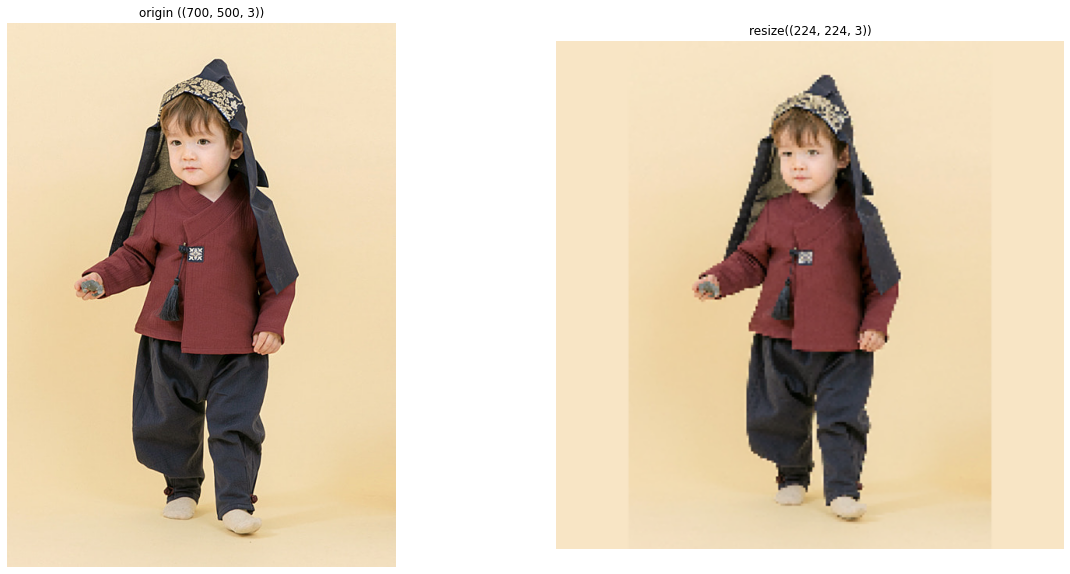

In [104]:
compare_image_test3(long[2])

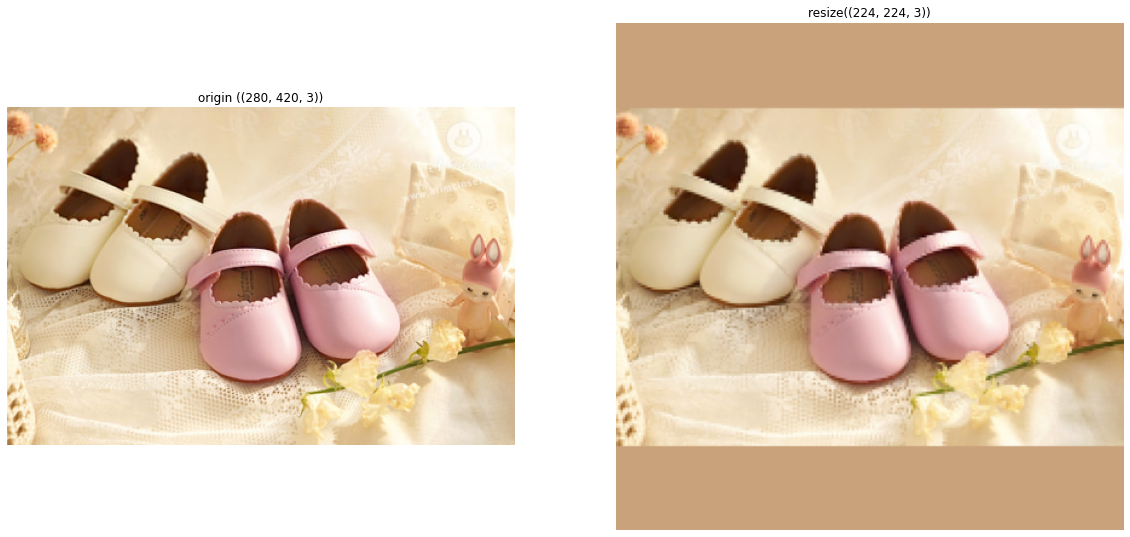

In [105]:
compare_image_test3(wide[1])